In [1]:
import keras
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import backend

Using TensorFlow backend.


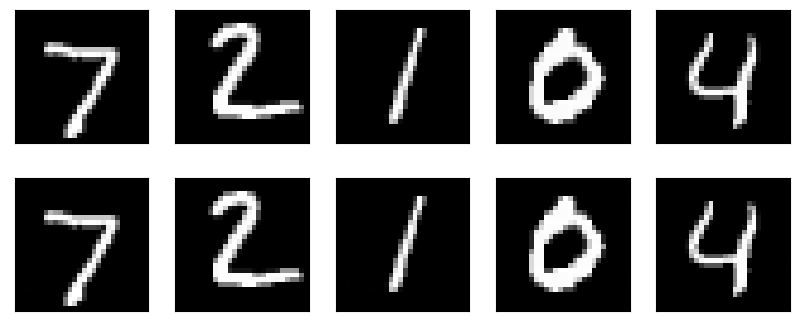

In [2]:
# Part 1
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Add random noise to the training images
noisy_x_train = x_train + np.random.normal(loc=0.5, scale=0.3, size=x_train.shape)
noisy_x_train = np.clip(noisy_x_train, 0, 255)  # Clip the values to ensure they are within the valid range

# Add random noise to the testing images
noisy_x_test = x_test + np.random.normal(loc=0.5, scale=0.3, size=x_test.shape)
noisy_x_test = np.clip(noisy_x_test, 0, 255)  # Clip the values to ensure they are within the valid range

# Print out several original and noisy images for inspection
n = 5  # Number of images to display
plt.figure(figsize=(10, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(noisy_x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
# Part 2
import numpy as np
from keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the MLNN model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on original data
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on original test data
original_data_accuracy = model.evaluate(x_test, y_test, verbose=0)[1]

# Add random noise to the training and testing data
noisy_x_train = x_train + np.random.normal(loc=0.5, scale=0.3, size=x_train.shape)
noisy_x_train = np.clip(noisy_x_train, 0, 1)  # Clip the values to ensure they are within the valid range
noisy_x_test = x_test + np.random.normal(loc=0.5, scale=0.3, size=x_test.shape)
noisy_x_test = np.clip(noisy_x_test, 0, 1)  # Clip the values to ensure they are within the valid range

# Train the model on noisy data
model.fit(noisy_x_train, y_train, epochs=10, validation_data=(noisy_x_test, y_test))

# Evaluate the model on noisy test data
noisy_data_accuracy = model.evaluate(noisy_x_test, y_test, verbose=0)[1]

# Compare the accuracies
print("Accuracy on original data:", original_data_accuracy)
print("Accuracy on noisy data:", noisy_data_accuracy)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2527 - accuracy: 0.9277 - val_loss: 0.1253 - val_accuracy: 0.9629
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1100 - accuracy: 0.9675 - val_loss: 0.1049 - val_accuracy: 0.9676
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0755 - accuracy: 0.9773 - val_loss: 0.0846 - val_accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0571 - accuracy: 0.9827 - val_loss: 0.0774 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0425 - accuracy: 0.9869 - val_loss: 0.0751 - val_accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0358 - accuracy: 0.9891 - val_loss: 0.0801 - val_accuracy: 0.9759
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0711 - val_accuracy:

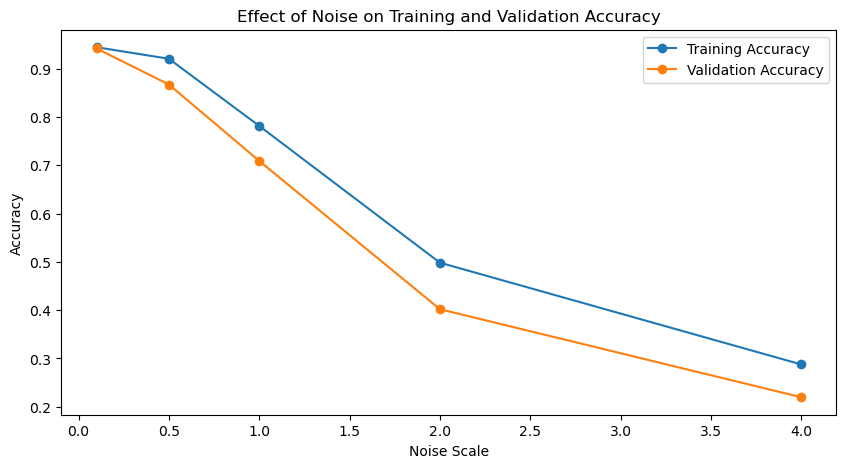

In [6]:
# Part 3
import numpy as np
from keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the MLNN model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Vary the amount of noise and track the accuracies
scales = [0.1, 0.5, 1.0, 2.0, 4.0]
train_accuracies = []
val_accuracies = []

for scale in scales:
    # Add random noise to the training and testing data
    noisy_x_train = x_train + np.random.normal(loc=0.5, scale=scale, size=x_train.shape)
    noisy_x_train = np.clip(noisy_x_train, 0, 1)  # Clip the values to ensure they are within the valid range
    noisy_x_test = x_test + np.random.normal(loc=0.5, scale=scale, size=x_test.shape)
    noisy_x_test = np.clip(noisy_x_test, 0, 1)  # Clip the values to ensure they are within the valid range

    # Train the model on noisy data
    history = model.fit(noisy_x_train, y_train, epochs=10, validation_data=(noisy_x_test, y_test), verbose=0)

    # Evaluate the model on noisy training and validation data
    train_accuracy = history.history['accuracy'][-1]
    val_accuracy = history.history['val_accuracy'][-1]

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(scales, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(scales, val_accuracies, marker='o', label='Validation Accuracy')
plt.xlabel('Noise Scale')
plt.ylabel('Accuracy')
plt.title('Effect of Noise on Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Part 4
# Compared to last week, the accuracy between the training and validation data is much closer graphically.